## Exercise 1

Given the following data:

| Tid | Refund | Marital Status | Taxable Income (K) | Cheat |
|-----|--------|----------------|--------------------|-------|
| 1   | Yes    | Single         | 125                | No    |
| 2   | No     | Married        | 100                | No    |
| 3   | No     | Single         | 70                 | No    |
| 4   | Yes    | Married        | 120                | No    |
| 5   | No     | Divorced       | 95                 | Yes   |
| 6   | No     | Married        | 60                 | No    |
| 7   | Yes    | Divorced       | 220                | No    |
| 8   | No     | Single         | 85                 | Yes   |
| 9   | No     | Married        | 75                 | No    |
| 10  | No     | Single         | 90                 | Yes   |

What is the best first split (using Gini - note, for the continuous feature, check quartile boundaries).

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# refund = yes
r_y = 1 - ((0/3)**2 + (3/3)**2)
print("refund = yes:", r_y)

# refund = no
r_n = 1 - ((3/7)**2 + (4/7)**2)
print("refund = no:", r_n)

# gini refund
g_r = (3/10)*r_y + (7/10)*r_n
print("gini refund:", g_r)

# can do the same with other attributes


refund = yes: 0.0
refund = no: 0.48979591836734704
gini refund: 0.3428571428571429


In [9]:
import pandas as pd

# Create DataFrame from sample data
data = {'Refund': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
        'MaritalStatus': ['Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Single'],
        'TaxableIncome': [125, 100, 70, 120, 95, 60, 220, 85, 75, 90],
        'Cheat': ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']}

df = pd.DataFrame(data)

## Exercise 2

Build a decision tree to fit the [federalist papers](https://www.kaggle.com/datasets/tobyanderson/federalist-papers_) data, available in the data directory (click on the link to find out more information about this data). Note that you should restrict your analysis to papers by Hamilton or Madison.  Plot your training and test scores to pick a value for ccp_alpha. What did you pick?  Run your trained classifier on the "disputed" papers.  What does your model tell you? 

In [11]:
import pandas as pd

url = "data/federalistpapers.csv"
df = pd.read_csv(url, header=0)

df = df.drop("filename", axis=1)
train = df[df.author!="dispt"]
test = df[df.author=="dispt"]
train = train[train.author.isin(["Hamilton", "Madison"])]
train.author.value_counts()
train['author'] = train.author=="Madison"
train.author.value_counts()


author
False    51
True     15
Name: count, dtype: int64

In [12]:
df.head()

,author,a,all,also,an,and,any,are,as,at,...,was,were,what,when,which,who,will,with,would,your
0,dispt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


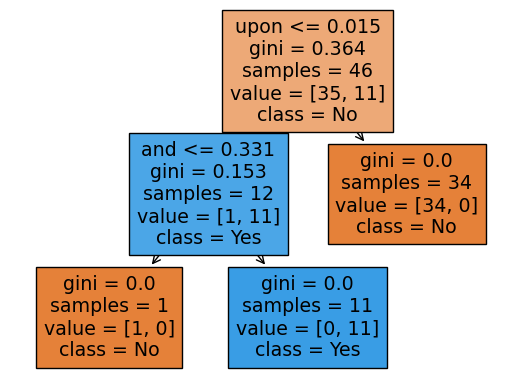

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = train.drop(["author"],axis=1)
y = train['author']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Visualize the tree
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()


## Exercise 3

Build a voting classifier for the federalist papers, using all of the non-ensemble methods you've been exposed to in this class thus far (i.e., KNN, SVM, logistic regression, naive bayes, SGDClassifier, decision tree).

1) Compare this to a RandomForest classifier.  Which works the best?
2) Compare this to a GradientBoosting classifier.  Which works the best?
3) Add the RandomForest and GradientBoosting classifiers to your voting classifier.  Does you performance improve?

In [1]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

data = load_wine()

# We'll use a data frame to make sure we get real feature names out
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

# Step 1: Load and preprocess the data
# Assuming you have already loaded the data into X (features) and y (labels)

# Step 2: Train individual classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SGD Classifier": SGDClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Step 3: Evaluate the performance of each classifier individually
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

# Step 4: Train RandomForest and GradientBoosting classifiers
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

rf_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)

rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
gb_accuracy = accuracy_score(y_test, gb_classifier.predict(X_test))

print(f"RandomForest Accuracy: {rf_accuracy}")
print(f"GradientBoosting Accuracy: {gb_accuracy}")

# Step 5: Create a voting classifier combining all the individual classifiers
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()] + [("RandomForest", rf_classifier), ("GradientBoosting", gb_classifier)]
)

# Step 6: Evaluate the performance of the voting classifier
voting_classifier.fit(X_train, y_train)
voting_accuracy = accuracy_score(y_test, voting_classifier.predict(X_test))
print(f"Voting Classifier Accuracy: {voting_accuracy}")

# Step 7: Compare the performance of the voting classifier with RandomForest and GradientBoosting classifiers
print(f"RandomForest vs Voting Classifier Accuracy: {rf_accuracy} vs {voting_accuracy}")
print(f"GradientBoosting vs Voting Classifier Accuracy: {gb_accuracy} vs {voting_accuracy}")


/tmp/ipykernel_41173/2678981361.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


KNN Accuracy: 0.7222222222222222
SVM Accuracy: 0.8055555555555556
Logistic Regression Accuracy: 0.9722222222222222
Naive Bayes Accuracy: 0.8888888888888888
SGD Classifier Accuracy: 0.5555555555555556
Decision Tree Accuracy: 0.9444444444444444


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForest Accuracy: 1.0
GradientBoosting Accuracy: 0.9444444444444444


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9722222222222222
RandomForest vs Voting Classifier Accuracy: 1.0 vs 0.9722222222222222
GradientBoosting vs Voting Classifier Accuracy: 0.9444444444444444 vs 0.9722222222222222


## Exercise 4

When does it make sense to use a Bagging Classifier?  In the following, explore different data parameters to develop your intuition for which classifier makes sense in which situation. 

1. Gradually increase the noise in the data (using the noise parameter).  How do the different classifiers perform.  Why?


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X, y = make_moons(n_samples=300, noise=.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_train_pred_tree = tree.predict(X_train)
print("Decision Tree Accuracy (train):", accuracy_score(y_train, y_train_pred_tree))
print("Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_tree))



log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_train_pred_log = log_reg.predict(X_train) 
print("Logistic Regression Accuracy (train):", accuracy_score(y_train, y_train_pred_log))
print("Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_log))

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

2.  Now, do the same thing in the following.  What do you notice. How do you explain your observations?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

max_samples = 100

X, y = make_moons(n_samples=300, noise=.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_tree.fit(X_train, y_train)
y_pred_bag_train = bag_tree.predict(X_train)
y_pred_bag = bag_tree.predict(X_test)
print("Bagging Decision Tree Accuracy (train):", accuracy_score(y_train, y_pred_bag_train))
print("Bagging Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_bag))


bag_log = BaggingClassifier(LogisticRegression(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_log.fit(X_train, y_train)
y_pred_bag_log_train = bag_log.predict(X_train)
y_pred_bag_log = bag_log.predict(X_test)
print("Bagging Logistic Regression Accuracy (train):", accuracy_score(y_train, y_pred_bag_log_train))
print("Bagging Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_bag_log))

3. Now go back and start increasing the `max_samples` parameter.  How do things change? 

## Exercise 5

The "wine" dataset contains data about the chemical makeup of different varieties of wine and critics scores.  Use XGBoost to build a classifier for this data.  Manually tune the hyperparameters of the XGBoost model to try to achieve better accuracy on the test set than the baseline model. Some hyperparameters to consider tweaking:
   - `learning_rate`
   - `max_depth`
   - `n_estimators`
   - `gamma`
   - `subsample`
   - `colsample_bytree`

See [the online docs](https://xgboost.readthedocs.io/en/stable/parameter.html) for more info.

After tuning, use the `plot_importance` function again to see if feature importances have changed after tuning.


1. How did hyperparameter tuning affect the model's accuracy? Which hyperparameters seemed to have the most influence?
2. Did feature importances change after tuning? If so, why might that be?

In [ ]:
# Run this if you don't have XGBoost installed
%pip install XGBoost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

data = load_wine()

# We'll use a data frame to make sure we get real feature names out
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(objective='multi:softprob', random_state=42)
clf.fit(X_train, y_train)

baseline_accuracy = clf.score(X_test, y_test)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

plot_importance(clf)
plt.show()